In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import cv2
from IPython.display import Image

from keras.models import load_model

In [2]:
age_model = load_model("age_model.h5")
gender_model = load_model("gender_model.h5")
emotion_model = load_model("emotion_model.h5")

In [3]:
age_ranges = ['1-2', '3-9', '10-20', '21-27', '28-45', '46-65', '66-116']
gender_ranges = ['male', 'female']
emotion_ranges= ['positive','negative','neutral']

In [4]:
def detect_features(frame):
  gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
  face_cascade = cv2.CascadeClassifier('./cv2_cascade_classifier/haarcascade_frontalface_default.xml')
  faces = face_cascade.detectMultiScale(gray, 1.3, 5)
  
  i = 0

  for (x,y,w,h) in faces:
    i = i+1
    cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)

    img_gray=gray[y:y+h,x:x+w]

    img = cv2.resize(img_gray, (200, 200), interpolation = cv2.INTER_AREA)
    image_array = np.array(img)
    image_input = np.expand_dims(image_array, axis=0)
    age_input = img.reshape(-1, 200, 200, 1)

    output_emotion= emotion_ranges[np.argmax(emotion_model.predict(image_input))]
    output_gender=gender_ranges[np.argmax(gender_model.predict(image_input))]
    output_age = age_ranges[np.argmax(age_model.predict(age_input))]

    output_str = str(i) + ": "+  output_gender + ', '+ output_age + ', '+ output_emotion
    
    col = (0,0,255)
    print(output_str)
    cv2.putText(frame, output_str,(x,y),cv2.FONT_HERSHEY_SIMPLEX,1,col,2)

  return frame

In [5]:
vid = cv2.VideoCapture(0)

while(True):

	ret, frame = vid.read()
	frame = cv2.flip(frame, 1)
	frame = detect_features(frame)
	cv2.imshow('work', frame)

	if cv2.waitKey(1) & 0xFF == ord('q'):
		break

vid.release()

cv2.destroyAllWindows()


1/1 [==============================] - 0s 97ms/step
1: male, 21-27, positive
1/1 [==============================] - 0s 61ms/step
1: male, 28-45, positive
1/1 [==============================] - 0s 32ms/step
1: male, 28-45, positive
1/1 [==============================] - 0s 67ms/step
1: male, 28-45, positive
1/1 [==============================] - 0s 31ms/step
1: male, 28-45, positive
1/1 [==============================] - 0s 40ms/step
1: male, 28-45, positive
1/1 [==============================] - 0s 42ms/step
1: male, 28-45, positive
1/1 [==============================] - 0s 26ms/step
1: male, 28-45, positive
1/1 [==============================] - 0s 21ms/step
1: male, 28-45, positive
1/1 [==============================] - 0s 34ms/step
1: male, 28-45, negative
1/1 [==============================] - 0s 36ms/step
1: male, 28-45, positive
1/1 [==============================] - 0s 23ms/step
1: male, 28-45, positive
1/1 [==============================] - 0s 27ms/step
1: male, 28-45, positive

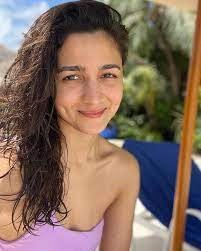

In [6]:
img_path = "./images/alia.jpeg"
img_pil = Image(filename=img_path)
display(img_pil)

1/1 [==============================] - 0s 30ms/step
1: female, 46-65, negative


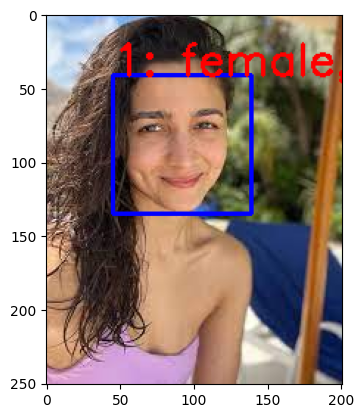

In [7]:
image = cv2.imread(img_path)
frame = detect_features(image)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))